### Capstone Idea

**Problem Statement:** 

Beta.SAM.gov is the successor, among other federal governmental websites, of fedbizops.gov. The part that interests me is that it has a searchable collection of federal awards, as well as an information system of past grants. The current system is not yet fully operational. Nonetheless, it allows to search the collection based on key terms, grant id, (ide meg egyebek). One of it's problems in the past was that while it was searchable, it did not have a recommender system. Businesses, especially small businesses had to spend a considerable amount of time to find relevant grant opportunities. This new system offers that. Creating an account will have the advantage of receiving updates. However, the downside of email updates is that it clogs up the email inbox, and it does not always generate the expected value:
- it is difficult to know whether there are more opportunities out there or just the ones about which a business gets notified
- reader fatigue may cause businesses not to look further for contract opportunities than what had already been sent to them - and thus leave potential fundings on the table
- someone still needs to sift through a large amount of potentially irrelevant federal grant description

All in all: a user controlled recommender system would enhance the effectiveness of grant searching for businesses that do not have lots of resources to allocate toward that activity in the first place. 

How it would work:

- based on archival data - it would search for similarities in 
   - business activity of applicants
   - name of funding agency
   
   - earlier search terms
   - successful earlier grant applications

-> it would give a list of potentially useful search term, with an option to click on a select few

-> based on the search terms selected - it will further tune the recommender system

-> businesses have an option of rating a recommendation up or down

- based on earlier search terms - one would have access to a longer list of opportunites - that would make browsing possible (right now - it looks to me - that is out of the question)

- companies could search for other relevant information - for example: which companies are applying for similar grants in their business and geographic area
   
   
[API documentation](https://open.gsa.gov/api/get-opportunities-public-api/#user-account-api-key-creation)

[Beta.SAM.gov](https://beta.sam.gov/)

**Recommender:**
    1. content based recommender system

Sources:
https://towardsdatascience.com/how-to-build-a-simple-recommender-system-in-python-375093c3fb7d

In [127]:
# imports
import pandas as pd
import requests
import time

In [128]:
# set display options 
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_colwidth', None)

In [61]:
# set base url

url = 'https://api.sam.gov/prod/opportunities/v1/search'

In [62]:
result = requests.get(url,
      params={
          'api_key': '',
          'postedFrom': '01/01/2020',
          'postedTo': '04/30/2020',
          'limit': 500
      })

In [65]:
result.headers

{'Access-Control-Allow-Origin': '*', 'Content-Type': 'application/json', 'Date': 'Tue, 12 May 2020 22:24:21 GMT', 'Server': 'openresty', 'X-Cache': 'MISS', 'Content-Length': '110', 'Connection': 'keep-alive', 'Strict-Transport-Security': 'max-age=31536000; includeSubDomains; preload', 'Set-Cookie': 'citrix_ns_id=H2FreQYUCD5zHz8POXKekDK4i/00001; Domain=.sam.gov; Path=/; Secure; HttpOnly'}

In [12]:
ops = result.json()

In [13]:
# get keys from json object
ops.keys()

dict_keys(['totalRecords', 'limit', 'offset', 'opportunitiesData', 'links'])

In [31]:
df = pd.DataFrame(ops['opportunitiesData'])
df.head()

,noticeId,title,solicitationNumber,department,subTier,office,postedDate,type,baseType,archiveType,archiveDate,typeOfSetAsideDescription,typeOfSetAside,responseDeadLine,naicsCode,classificationCode,active,award,pointOfContact,description,organizationType,officeAddress,placeOfPerformance,additionalInfoLink,uiLink,links,resourceLinks
0,fffe1c1717fd4134918105ebe56573fa,"62--CONTROLLER,DIMMER",SPE4A620T685E,DEPT OF DEFENSE,DEFENSE LOGISTICS AGENCY (DLA),DLA AVIATION,2020-04-30,Award Notice,Award Notice,auto15,2020-05-15,None,None,None,336320,62,Yes,"{'date': '2020-04-30', 'number': 'SPE4A620V997...","[{'fax': None, 'type': 'primary', 'email': 'RO...",https://api.sam.gov/prod/opportunities/v1/noti...,OFFICE,"{'zipcode': '23297', 'city': 'RICHMOND', 'coun...",{},None,https://beta.sam.gov/opp/fffe1c1717fd413491810...,"[{'rel': 'self', 'href': 'https://api.sam.gov/...",None
1,fffc883019be4e46b48d0e8a04d98b9c,"25--LADDER,VEHICLE BOAR",SPE7L520U0365,DEPT OF DEFENSE,DEFENSE LOGISTICS AGENCY (DLA),DLA LAND AND MARITIME,2020-04-30,Combined Synopsis/Solicitation,Combined Synopsis/Solicitation,autocustom,2020-06-14,Total Small Business Set-Aside (FAR 19.5),SBA,2020-05-15,332999,25,Yes,{'awardee': {'location': {}}},"[{'fax': None, 'type': 'primary', 'email': 'Di...",https://api.sam.gov/prod/opportunities/v1/noti...,OFFICE,"{'zipcode': '43218-3990', 'city': 'COLUMBUS', ...",{},None,https://beta.sam.gov/opp/fffc883019be4e46b48d0...,"[{'rel': 'self', 'href': 'https://api.sam.gov/...",None
2,ffe1e325188c4e5884bef45d9bee277a,"Q402--Community Nursing Home for Louisiana, T...",36C25620Q0572,"VETERANS AFFAIRS, DEPARTMENT OF","VETERANS AFFAIRS, DEPARTMENT OF",256-NETWORK CONTRACT OFFICE 16 (36C256),2020-04-30,Sources Sought,Sources Sought,autocustom,2020-08-10,None,None,2020-05-12,623110,Q402,Yes,{'awardee': {'location': {}}},"[{'fax': None, 'type': 'primary', 'email': 'ph...",https://api.sam.gov/prod/opportunities/v1/noti...,OFFICE,"{'zipcode': '39157', 'city': 'RIDGELAND', 'cou...",{'streetAddress': '510 E. Stoner Ave;Shrevepor...,None,https://beta.sam.gov/opp/ffe1e325188c4e5884bef...,"[{'rel': 'self', 'href': 'https://api.sam.gov/...",None
3,ffd9e50512414ca3abf3a033f10f6a37,Radiant Scroll RFI,CFO4B7-20-04,DEPT OF DEFENSE,DEFENSE INTELLIGENCE AGENCY (DIA),VIRGINIA CONTRACTING ACTIVITY,2020-04-30,Sources Sought,Sources Sought,auto15,2020-06-18,None,None,2020-06-03T14:00:00-04:00,None,None,Yes,None,"[{'fax': '', 'type': 'primary', 'email': 'bian...",https://api.sam.gov/prod/opportunities/v1/noti...,OFFICE,"{'zipcode': '203405100', 'city': 'WASHINGTON',...","{'country': {'code': 'USA', 'name': 'UNITED ST...",None,https://beta.sam.gov/opp/ffd9e50512414ca3abf3a...,"[{'rel': 'self', 'href': 'https://api.sam.gov/...",None
4,ffb8232fcafb4be392684619b2fa1a96,SPRDL1-20-R-0013 Circuit Card Assembly,SPRDL1-20-R-0013,DEPT OF DEFENSE,DEFENSE LOGISTICS AGENCY (DLA),DLA LAND WARREN,2020-04-30,Solicitation,Solicitation,auto15,2020-06-13,None,None,2020-05-29T23:30:00-04:00,335931,5998,Yes,None,"[{'fax': '', 'type': 'primary', 'email': 'kris...",https://api.sam.gov/prod/opportunities/v1/noti...,OFFICE,"{'zipcode': '48397-5000', 'city': 'WARREN', 'c...",None,None,https://beta.sam.gov/opp/ffb8232fcafb4be392684...,"[{'rel': 'self', 'href': 'https://api.sam.gov/...",[https://beta.sam.gov/api/prod/opps/v3/opportu...


In [60]:
df.to_csv('./data/first_pull.csv', index=False)

In [43]:
df.shape

(500, 27)

In [42]:
df['subTier'].value_counts().sum()

500

In [33]:
df['description'][1]

'https://api.sam.gov/prod/opportunities/v1/noticedesc?noticeid=fffc883019be4e46b48d0e8a04d98b9c'

In [23]:
# get description from one link 

url_des = df['description'][1]
des1 = requests.get(url_des,
      params={
          'api_key': ''
      })


In [24]:
des1.status_code

200

In [28]:
content = des1.json()
content['description']

'Proposed procurement for NSN 2541013588635 LADDER,VEHICLE BOAR:\nLine 0001 Qty 13     UI EA  Deliver To:  By: 0125 DAYS ADO\nThis Solicitation may result in an Automated IDC (Indefinite Delivery Contract). The term of the contract/order will be one year or until the aggregate total of orders placed against the contract/order reach 250000.00. The estimated number of orders per year is 12. The Guaranteed Minimum quantity will be 1. Items will be shipped to various CONUS and OCONUS (via consolidation and containerization point) DLA Depots.\nApproved source is 98255 SW33208-303.\nThe solicitation is an RFQ and will be available at the link provided in this notice.  Hard copies of this solicitation are not available. Specifications, plans, or drawings are not available.\nAll responsible sources may submit a quote which, if timely received, shall be considered.\nQuotes must be submitted electronically.\n'

In [32]:
df['uiLink'][1]

'https://beta.sam.gov/opp/fffc883019be4e46b48d0e8a04d98b9c/view'

In [34]:
# get content of 1 uiLink
url_cont = df['uiLink'][1]
cont1 = requests.get(url_des,
      params={
          'api_key': ''
      })

In [37]:
cont = cont1.json()

In [39]:
cont['description']

'Proposed procurement for NSN 2541013588635 LADDER,VEHICLE BOAR:\nLine 0001 Qty 13     UI EA  Deliver To:  By: 0125 DAYS ADO\nThis Solicitation may result in an Automated IDC (Indefinite Delivery Contract). The term of the contract/order will be one year or until the aggregate total of orders placed against the contract/order reach 250000.00. The estimated number of orders per year is 12. The Guaranteed Minimum quantity will be 1. Items will be shipped to various CONUS and OCONUS (via consolidation and containerization point) DLA Depots.\nApproved source is 98255 SW33208-303.\nThe solicitation is an RFQ and will be available at the link provided in this notice.  Hard copies of this solicitation are not available. Specifications, plans, or drawings are not available.\nAll responsible sources may submit a quote which, if timely received, shall be considered.\nQuotes must be submitted electronically.\n'

In [40]:
df['links'][1]

[{'rel': 'self',
  'href': 'https://api.sam.gov/prod/opportunities/v1/search?noticeid=fffc883019be4e46b48d0e8a04d98b9c&limit=1',
  'hreflang': None,
  'media': None,
  'title': None,
  'type': None,
  'deprecation': None}]

In [66]:
# create for loop to
# get description of contract opportunities
# based on link in 'description' column

# create empty list of descriptions
descriptions = []
# instantiate counter
count = 0

for link in df['description']:
    count += 1
    print(f'Requesting link {link}')
    
    # try requesting url
    try:
        # request link
        des = requests.get(link,
                           params={
                              'api_key': ''
                          })
        # decode 
        bag = des.json()
        
        if 'description' in bag.keys():
            descriptions.append(bag['description'])
            print(des.status_code)
            print(f'processed row {count}')
        else:
            if 'error' in bag.keys():
                print(f"Error: {bag['error']}" )
            else:
                print(bag.keys())
    # if error (for example: no content found at the given website)
    # try url in next row
    except Error as err:
        print(f"Error: {err}")
    except:
        print("Unexpected error:", sys.exc_info()[0])
        raise    

Requesting link https://api.sam.gov/prod/opportunities/v1/noticedesc?noticeid=fffe1c1717fd4134918105ebe56573fa
Error: {'code': 'OVER_RATE_LIMIT', 'message': 'The API key has exceeded the rate limits.'}
Requesting link https://api.sam.gov/prod/opportunities/v1/noticedesc?noticeid=fffc883019be4e46b48d0e8a04d98b9c
Error: {'code': 'OVER_RATE_LIMIT', 'message': 'The API key has exceeded the rate limits.'}
Requesting link https://api.sam.gov/prod/opportunities/v1/noticedesc?noticeid=ffe1e325188c4e5884bef45d9bee277a
Error: {'code': 'OVER_RATE_LIMIT', 'message': 'The API key has exceeded the rate limits.'}
Requesting link https://api.sam.gov/prod/opportunities/v1/noticedesc?noticeid=ffd9e50512414ca3abf3a033f10f6a37
Error: {'code': 'OVER_RATE_LIMIT', 'message': 'The API key has exceeded the rate limits.'}
Requesting link https://api.sam.gov/prod/opportunities/v1/noticedesc?noticeid=ffb8232fcafb4be392684619b2fa1a96
Error: {'code': 'OVER_RATE_LIMIT', 'message': 'The API key has exceeded the rate 

In [50]:
descriptions

[]

In [56]:
url_des = df['description'][2]
des1 = requests.get(url_des,
      params={
          'api_key': ''
      })

In [59]:
des1.

{'Access-Control-Allow-Origin': '*', 'Content-Type': 'application/json', 'Date': 'Tue, 12 May 2020 22:13:35 GMT', 'Server': 'openresty', 'X-Cache': 'MISS', 'Content-Length': '110', 'Connection': 'keep-alive', 'Strict-Transport-Security': 'max-age=31536000; includeSubDomains; preload', 'Set-Cookie': 'citrix_ns_id=DoO79PB128vwCDqtv/6kdq8vdrM0001; Domain=.sam.gov; Path=/; Secure; HttpOnly'}

In [79]:
url_new = 'https://training.grants.gov/grantsws/rest/opportunities'

In [80]:
result = requests.get(url_new,
      params={
          'api_key': '',
          'postedFrom': '01/01/2020',
          'postedTo': '04/30/2020',
          'limit': 500
      })

In [81]:
result.status_code


404

## EDA

In [83]:
df.head()

,noticeId,title,solicitationNumber,department,subTier,office,postedDate,type,baseType,archiveType,archiveDate,typeOfSetAsideDescription,typeOfSetAside,responseDeadLine,naicsCode,classificationCode,active,award,pointOfContact,description,organizationType,officeAddress,placeOfPerformance,additionalInfoLink,uiLink,links,resourceLinks
0,fffe1c1717fd4134918105ebe56573fa,"62--CONTROLLER,DIMMER",SPE4A620T685E,DEPT OF DEFENSE,DEFENSE LOGISTICS AGENCY (DLA),DLA AVIATION,2020-04-30,Award Notice,Award Notice,auto15,2020-05-15,None,None,None,336320,62,Yes,"{'date': '2020-04-30', 'number': 'SPE4A620V997...","[{'fax': None, 'type': 'primary', 'email': 'RO...",https://api.sam.gov/prod/opportunities/v1/noti...,OFFICE,"{'zipcode': '23297', 'city': 'RICHMOND', 'coun...",{},None,https://beta.sam.gov/opp/fffe1c1717fd413491810...,"[{'rel': 'self', 'href': 'https://api.sam.gov/...",None
1,fffc883019be4e46b48d0e8a04d98b9c,"25--LADDER,VEHICLE BOAR",SPE7L520U0365,DEPT OF DEFENSE,DEFENSE LOGISTICS AGENCY (DLA),DLA LAND AND MARITIME,2020-04-30,Combined Synopsis/Solicitation,Combined Synopsis/Solicitation,autocustom,2020-06-14,Total Small Business Set-Aside (FAR 19.5),SBA,2020-05-15,332999,25,Yes,{'awardee': {'location': {}}},"[{'fax': None, 'type': 'primary', 'email': 'Di...",https://api.sam.gov/prod/opportunities/v1/noti...,OFFICE,"{'zipcode': '43218-3990', 'city': 'COLUMBUS', ...",{},None,https://beta.sam.gov/opp/fffc883019be4e46b48d0...,"[{'rel': 'self', 'href': 'https://api.sam.gov/...",None
2,ffe1e325188c4e5884bef45d9bee277a,"Q402--Community Nursing Home for Louisiana, T...",36C25620Q0572,"VETERANS AFFAIRS, DEPARTMENT OF","VETERANS AFFAIRS, DEPARTMENT OF",256-NETWORK CONTRACT OFFICE 16 (36C256),2020-04-30,Sources Sought,Sources Sought,autocustom,2020-08-10,None,None,2020-05-12,623110,Q402,Yes,{'awardee': {'location': {}}},"[{'fax': None, 'type': 'primary', 'email': 'ph...",https://api.sam.gov/prod/opportunities/v1/noti...,OFFICE,"{'zipcode': '39157', 'city': 'RIDGELAND', 'cou...",{'streetAddress': '510 E. Stoner Ave;Shrevepor...,None,https://beta.sam.gov/opp/ffe1e325188c4e5884bef...,"[{'rel': 'self', 'href': 'https://api.sam.gov/...",None
3,ffd9e50512414ca3abf3a033f10f6a37,Radiant Scroll RFI,CFO4B7-20-04,DEPT OF DEFENSE,DEFENSE INTELLIGENCE AGENCY (DIA),VIRGINIA CONTRACTING ACTIVITY,2020-04-30,Sources Sought,Sources Sought,auto15,2020-06-18,None,None,2020-06-03T14:00:00-04:00,None,None,Yes,None,"[{'fax': '', 'type': 'primary', 'email': 'bian...",https://api.sam.gov/prod/opportunities/v1/noti...,OFFICE,"{'zipcode': '203405100', 'city': 'WASHINGTON',...","{'country': {'code': 'USA', 'name': 'UNITED ST...",None,https://beta.sam.gov/opp/ffd9e50512414ca3abf3a...,"[{'rel': 'self', 'href': 'https://api.sam.gov/...",None
4,ffb8232fcafb4be392684619b2fa1a96,SPRDL1-20-R-0013 Circuit Card Assembly,SPRDL1-20-R-0013,DEPT OF DEFENSE,DEFENSE LOGISTICS AGENCY (DLA),DLA LAND WARREN,2020-04-30,Solicitation,Solicitation,auto15,2020-06-13,None,None,2020-05-29T23:30:00-04:00,335931,5998,Yes,None,"[{'fax': '', 'type': 'primary', 'email': 'kris...",https://api.sam.gov/prod/opportunities/v1/noti...,OFFICE,"{'zipcode': '48397-5000', 'city': 'WARREN', 'c...",None,None,https://beta.sam.gov/opp/ffb8232fcafb4be392684...,"[{'rel': 'self', 'href': 'https://api.sam.gov/...",[https://beta.sam.gov/api/prod/opps/v3/opportu...


In [84]:
df.tail()

,noticeId,title,solicitationNumber,department,subTier,office,postedDate,type,baseType,archiveType,archiveDate,typeOfSetAsideDescription,typeOfSetAside,responseDeadLine,naicsCode,classificationCode,active,award,pointOfContact,description,organizationType,officeAddress,placeOfPerformance,additionalInfoLink,uiLink,links,resourceLinks
495,b11e32185b034698a75c33b38c153eda,"47--CLAMP,HOSE",SPE7M320T9231,DEPT OF DEFENSE,DEFENSE LOGISTICS AGENCY (DLA),DLA LAND AND MARITIME,2020-04-30,Combined Synopsis/Solicitation,Combined Synopsis/Solicitation,autocustom,2020-06-10,Service-Disabled Veteran-Owned Small Business ...,SDVOSBC,2020-05-11,332996,47,Yes,{'awardee': {'location': {}}},"[{'fax': None, 'type': 'primary', 'email': 'Di...",https://api.sam.gov/prod/opportunities/v1/noti...,OFFICE,"{'zipcode': '43218-3990', 'city': 'COLUMBUS', ...",{},None,https://beta.sam.gov/opp/b11e32185b034698a75c3...,"[{'rel': 'self', 'href': 'https://api.sam.gov/...",None
496,b11470a7ca4e4d04be3f9f350959f000,TEMP ELEC RENTAL PACKAGE,N3904020Q0156,DEPT OF DEFENSE,DEPT OF THE NAVY,PORTSMOUTH NAVAL SHIPYARD GF,2020-04-30,Combined Synopsis/Solicitation,Combined Synopsis/Solicitation,auto15,2020-05-21,None,None,2020-05-06T18:00:00-04:00,532490,W059,Yes,None,"[{'fax': '2074384913', 'type': 'primary', 'ema...",https://api.sam.gov/prod/opportunities/v1/noti...,OFFICE,"{'zipcode': '03801-5000', 'city': 'PORTSMOUTH'...","{'city': {'code': '34180', 'name': 'Groton'}, ...",None,https://beta.sam.gov/opp/b11470a7ca4e4d04be3f9...,"[{'rel': 'self', 'href': 'https://api.sam.gov/...",[https://beta.sam.gov/api/prod/opps/v3/opportu...
497,b09fb1db8eb04922929ac66df49f07fc,"25--GRILLE,METAL",SPE7L320U1292,DEPT OF DEFENSE,DEFENSE LOGISTICS AGENCY (DLA),DLA LAND AND MARITIME,2020-04-30,Combined Synopsis/Solicitation,Combined Synopsis/Solicitation,autocustom,2020-06-14,None,None,2020-05-15,333912,25,Yes,{'awardee': {'location': {}}},"[{'fax': None, 'type': 'primary', 'email': 'Di...",https://api.sam.gov/prod/opportunities/v1/noti...,OFFICE,"{'zipcode': '43218-3990', 'city': 'COLUMBUS', ...",{},None,https://beta.sam.gov/opp/b09fb1db8eb04922929ac...,"[{'rel': 'self', 'href': 'https://api.sam.gov/...",None
498,b097c861f25c4803bddf7428763f6da2,"Battery Chargers for Devils Lake, ND, and Greg...",89503420QWA000308,"ENERGY, DEPARTMENT OF","ENERGY, DEPARTMENT OF",WESTERN-UPPPER GREAT PLAINS REGION,2020-04-30,Solicitation,Presolicitation,auto15,2020-05-23,Total Small Business Set-Aside (FAR 19.5),SBA,2020-05-08T12:00:00-05:00,335999,6150,Yes,None,"[{'fax': '6053532645', 'type': 'primary', 'ema...",https://api.sam.gov/prod/opportunities/v1/noti...,OFFICE,"{'zipcode': '59101', 'city': 'BILLINGS', 'coun...","{'city': {'code': '19420', 'name': 'Devils Lak...",None,https://beta.sam.gov/opp/b097c861f25c4803bddf7...,"[{'rel': 'self', 'href': 'https://api.sam.gov/...",[https://beta.sam.gov/api/prod/opps/v3/opportu...
499,b06f096ac0cf48239edb581703a9af6a,"25--BRACKET,VEHICULAR C",SPE7L320U1311,DEPT OF DEFENSE,DEFENSE LOGISTICS AGENCY (DLA),DLA LAND AND MARITIME,2020-04-30,Combined Synopsis/Solicitation,Combined Synopsis/Solicitation,autocustom,2020-06-14,None,None,2020-05-15,332510,25,Yes,{'awardee': {'location': {}}},"[{'fax': None, 'type': 'primary', 'email': 'Di...",https://api.sam.gov/prod/opportunities/v1/noti...,OFFICE,"{'zipcode': '43218-3990', 'city': 'COLUMBUS', ...",{},None,https://beta.sam.gov/opp/b06f096ac0cf48239edb5...,"[{'rel': 'self', 'href': 'https://api.sam.gov/...",None


In [85]:
# inspect data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   noticeId                   500 non-null    object
 1   title                      500 non-null    object
 2   solicitationNumber         499 non-null    object
 3   department                 500 non-null    object
 4   subTier                    500 non-null    object
 5   office                     500 non-null    object
 6   postedDate                 500 non-null    object
 7   type                       500 non-null    object
 8   baseType                   500 non-null    object
 9   archiveType                500 non-null    object
 10  archiveDate                500 non-null    object
 11  typeOfSetAsideDescription  174 non-null    object
 12  typeOfSetAside             175 non-null    object
 13  responseDeadLine           362 non-null    object
 14  naicsCode 

In [87]:
import matplotlib.pyplot as plt

In [100]:
# columns with missing values

cols_w_missings = df.loc[:, df.isna().sum() > 0]

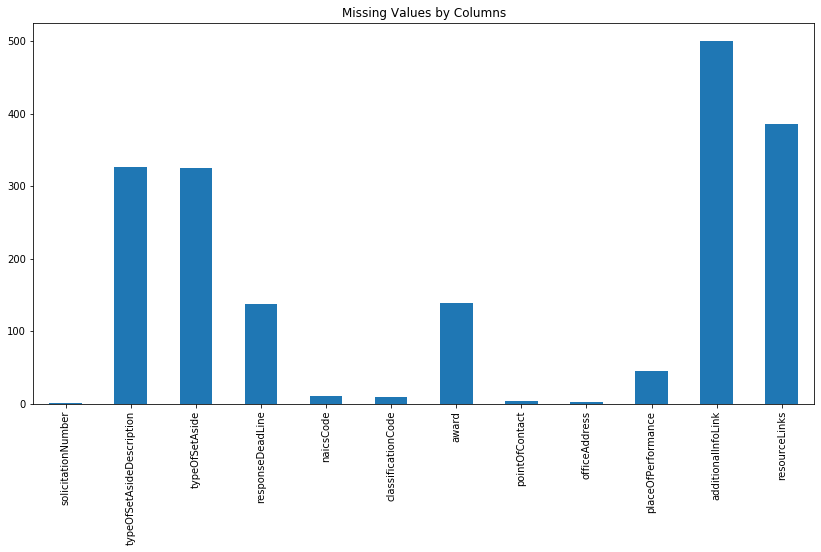

In [105]:

# plot missing data
# set figsize
plt.figure(figsize=(14, 7))
# set title
plt.title('Missing Values by Columns')   
# plot the number of missing values in each column
cols_w_missings.isna().sum().plot(kind='bar');

In [115]:
# prints
print(f'Number of observations: {df.shape[0]}')
print('')
print('Number of missing values:')
for i in range(len(cols_w_missings.columns)):
    print(f'    {cols_w_missings.columns[i]} column\
    = {cols_w_missings[cols_w_missings.columns[i]].isna().sum()}')

Number of observations: 500

Number of missing values:
    solicitationNumber column    = 1
    typeOfSetAsideDescription column    = 326
    typeOfSetAside column    = 325
    responseDeadLine column    = 138
    naicsCode column    = 10
    classificationCode column    = 9
    award column    = 139
    pointOfContact column    = 4
    officeAddress column    = 2
    placeOfPerformance column    = 45
    additionalInfoLink column    = 500
    resourceLinks column    = 386


In [119]:
# drop additionalInfoLink column

df.drop('additionalInfoLink', axis=1, inplace=True)

In [123]:
# inspect title column

df['title'].head(15)

0                                                                   62--CONTROLLER,DIMMER
1                                                                 25--LADDER,VEHICLE BOAR
2     Q402--Community Nursing Home  for Louisiana, Texas, and Arkansas Catchment Areas   
3                                                                      Radiant Scroll RFI
4                                                  SPRDL1-20-R-0013 Circuit Card Assembly
5                                                                         16--MASK,OXYGEN
6                                                                 15--TRAILING EDGE ASSY,
7                                                    Stryker Medium Caliber Weapon System
8                                                                   43--COMPRESSOR,ROTARY
9                                                                 59--RELAY,ELECTROMAGNET
10                                                                15--HOUSING ASSEMBLY,CO
11        

In [133]:
from nltk.tokenize import RegexpTokenizer

In [145]:
# define function to tokenize a column

def tokenizer_function(column):
    """
    Takes in a text column
        tokenizes the text in each row
        using pattern [[a-zA-Z]\w+]
        which matches every lowercase and upperase character between a-z that are word characters
    Returns list of strings
    """
    
    # instantiate empty list of tokenized text
    texts = []
    
    # instantiate tokenizer
    tokenizer = RegexpTokenizer('[a-zA-Z]\w+')
    
    # create for loop to tokenize each row and add the list of tokens to texts
    for text in column:
        tokens = tokenizer.tokenize(text)
        
        # transform tokens into lower case strings
        tokens = [token.lower() for token in tokens]
        texts.append(tokens)
    return pd.Series(texts)

In [146]:
# call tokenizer function on df['title']

tokenizer_function(df['title'])

0                                                                          [controller, dimmer]
1                                                                       [ladder, vehicle, boar]
2      [q402, community, nursing, home, for, louisiana, texas, and, arkansas, catchment, areas]
3                                                                        [radiant, scroll, rfi]
4                                                             [sprdl1, circuit, card, assembly]
                                                 ...                                           
495                                                                               [clamp, hose]
496                                                               [temp, elec, rental, package]
497                                                                             [grille, metal]
498                                [battery, chargers, for, devils, lake, nd, and, gregory, sd]
499                                     